In [ ]:
# Roboflow에서 데이터셋 다운로드
!curl -L "https://public.roboflow.com/ds/WR5OCb87sw?key=2dbcCWGChe" > roboflow.zip
!unzip roboflow.zip
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1389      0 --:--:-- --:--:-- --:--:--  1389
100 46.0M  100 46.0M    0     0  19.3M      0  0:00:02  0:00:02 --:--:-- 36.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

In [ ]:
# YOLOv5 GitHub 레포지토리 클론
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.23 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (11898/11898), done.


In [1]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# YOLOv5 디렉토리로 이동 후 requirements 설치
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 57.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [ ]:
# 학습 설정 파일(data.yaml) 내용 확인
%cat /content/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [ ]:
from glob import glob

# 학습 이미지 경로 수집
train_img_list = glob('/content/train/images/*.jpg')
print("Train:", len(train_img_list))

# 검증 이미지 경로 수집
valid_img_list = glob('/content/valid/images/*.jpg')
print("Valid:", len(valid_img_list))

# 테스트 이미지 경로 수집
test_img_list = glob('/content/test/images/*.jpg')
print("Test:", len(test_img_list))

Train: 465
Valid: 133
Test: 67


In [ ]:
# 학습/검증 이미지 경로 텍스트 파일 저장
with open('/content/train/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/valid/val.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')

# data.yaml 업데이트
import yaml
with open('/content/data.yaml', 'r') as f:
    data = yaml.full_load(f)

data['train'] = '/content/train/train.txt'
data['val'] = '/content/valid/val.txt'

with open('/content/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '/content/train/train.txt', 'val': '/content/valid/val.txt', 'nc': 1, 'names': ['pothole']}


In [ ]:
%cd /content/yolov5

# YOLOv5 학습 시작
!python train.py --img 416 --batch 16 --epochs 30 --data /content/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-02 08:04:11.695404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743581051.993235    1416 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743581052.074978    1416 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/valid/images/img-335_jpg.rf.2784b7f52fc84c400b8ede76eef98215.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/valid/images/img-335_jpg.rf.2784b7f52fc84c400b8ede76eef98215.jpg: 320x416 2 potholes, 122.9ms
Speed: 0.5ms pre-process, 122.9ms inference, 379.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs

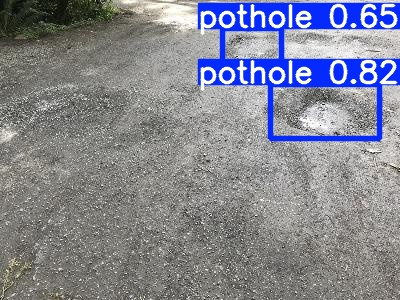

In [ ]:
from IPython.display import Image
import os

val_img_path = valid_img_list[1]

# 이미지 감지 수행
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

# 감지된 이미지 출력
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

# Image Test



In [2]:
import cv2
import torch
import numpy as np

# 모델 불러오기
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

# 이미지 로드 및 변환
img_path = valid_img_list[9]
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img_rgb).to(device)

# 깊이 예측
with torch.no_grad():
    depth_prediction = midas(input_batch)
    depth_prediction = torch.nn.functional.interpolate(
        depth_prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

# 깊이맵 시각화
depth_map = depth_prediction.cpu().numpy()
depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

# 객체 탐지 및 깊이 정보 결합
results = yolo_model(img)
pothole_boxes = results.xyxy[0].cpu().numpy()

for box in pothole_boxes:
    x1, y1, x2, y2, conf, cls = map(int, box[:4])
    pothole_depth_map = depth_map[y1:y2, x1:x2]
    median_depth = np.median(pothole_depth_map)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"Depth: {median_depth:.2f}"
    text_pos = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
    cv2.putText(img, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    img[y1:y2, x1:x2] = cv2.addWeighted(img[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

# 이미지 저장
output_path = '/content/detected_depth_image.jpg'
cv2.imwrite(output_path, img)
print(f"결과 이미지를 '{output_path}'에 저장했습니다.")

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-8 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)



Exception: [Errno 2] No such file or directory: '/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

# Video Test (frame capture)

In [ ]:
import cv2
import torch
import numpy as np
import os
import json

# ===============================
# 모델 로딩 (YOLOv5 + MiDaS)
# ===============================

# 커스텀 학습된 YOLOv5 모델 로드 (포트홀 탐지용)
yolo_model = torch.hub.load(
    'ultralytics/yolov5', 'custom',
    path='/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'
)
yolo_model.eval()

# MiDaS 모델 로드 (깊이 추정용)
model_type = "MiDaS_small"  # 빠른 처리용 소형 모델
midas = torch.hub.load("intel-isl/MiDaS", model_type)

# CPU 또는 GPU 장치 설정
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

# MiDaS 입력 이미지 변환 함수 로딩
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

# ===============================
# 테스트할 영상 설정
# ===============================

test_video = 'pothole_test_2'
input_video_path = f'/content/drive/MyDrive/test/testdata_mp4/{test_video}.mp4'  # 입력 영상 경로
output_video_path = f'/content/drive/MyDrive/test/test_result/{test_video}_result.mp4'  # 결과 영상 저장 경로

# 포트홀이 감지된 프레임 저장 디렉토리 생성
capture_dir = f'/content/drive/MyDrive/test/test_result/{test_video}_captures'
os.makedirs(capture_dir, exist_ok=True)

# ===============================
# 영상 파일 열기 및 저장 준비
# ===============================

cap = cv2.VideoCapture(input_video_path)  # 영상 파일 열기
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    # 프레임 너비
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 프레임 높이
fps = cap.get(cv2.CAP_PROP_FPS)                         # 초당 프레임 수

# 결과 영상 저장 객체 초기화
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0        # 현재 처리 중인 프레임 번호
saved_frame_id = 1     # 포트홀이 감지된 프레임 번호 (저장용)

# ===============================
# 프레임 단위로 처리 시작
# ===============================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print(f"Finished processing video. Total frames processed: {frame_count}")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}")

    # ====== MiDaS를 통한 깊이 추정 ======
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # OpenCV BGR → RGB
    input_batch = transform(frame_rgb).to(device)       # MiDaS용 전처리

    with torch.no_grad():
        depth_prediction = midas(input_batch)           # 깊이 추정
        depth_prediction = torch.nn.functional.interpolate(
            depth_prediction.unsqueeze(1),
            size=frame.shape[:2],  # 원본 프레임 크기로 보간
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    # 깊이 맵 후처리: 정규화 및 컬러맵 변환
    depth_map = depth_prediction.cpu().numpy()
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
    depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

    # ====== YOLO를 통한 포트홀 탐지 ======
    results = yolo_model(frame)  # 프레임에 대해 객체 탐지 실행
    pothole_boxes = results.xyxy[0].cpu().numpy()  # 바운딩 박스 좌표 및 클래스 정보

    pothole_infos = []     # 현재 프레임의 포트홀 정보 저장 리스트
    pothole_detected = False  # 포트홀 탐지 여부

    for box in pothole_boxes:
        if len(box) < 6:
            continue  # 박스 정보가 부족한 경우 무시

        # 바운딩 박스 좌표 및 클래스 정보 추출
        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

        # 해당 박스 영역의 깊이 값 추출 및 중앙값 계산
        pothole_depth_map = depth_map[y1:y2, x1:x2]
        median_depth = float(np.median(pothole_depth_map))

        # 시각화: 바운딩 박스, 깊이 텍스트, 컬러맵 덧씌우기
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"Depth: {median_depth:.2f}"
        text_pos = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
        cv2.putText(frame, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        frame[y1:y2, x1:x2] = cv2.addWeighted(
            frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

        # JSON 저장용 포트홀 정보 구성
        pothole_infos.append({
            "id": saved_frame_id,
            "porthole_location": (x1 + x2) // 2,  # 중심 위치
            "isporthole": True,
            "depth": round(median_depth, 2)
        })

        pothole_detected = True

    # ====== 포트홀이 감지된 경우 결과 저장 ======
    if pothole_detected:
        # 프레임 이미지 저장
        capture_path = os.path.join(capture_dir, f"frame_{saved_frame_id}.jpg")
        cv2.imwrite(capture_path, frame)

        # 포트홀 정보 텍스트 파일로 저장 (.json 확장자지만 라인별 JSON 구조)
        json_path = os.path.join(capture_dir, f"frame_{saved_frame_id}.txt")
        with open(json_path, 'w') as f:
            for info in pothole_infos:
                f.write(json.dumps(info) + '\n')

        print(f"Saved frame {saved_frame_id} with pothole data")
        saved_frame_id += 1

    # ====== 결과 프레임을 영상에 쓰기 ======
    out.write(frame)

# ===============================
# 자원 해제
# ===============================
cap.release()
out.release()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-2 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1
Processing frame 2
Processing frame 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4
Processing frame 5
Processing frame 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7
Processing frame 8
Processing frame 9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10
Processing frame 11
Processing frame 12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13
Processing frame 14
Processing frame 15


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16
Processing frame 17
Processing frame 18


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 19
Processing frame 20
Processing frame 21


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 22
Processing frame 23
Processing frame 24


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 25
Processing frame 26
Processing frame 27


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 28
Processing frame 29
Processing frame 30


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 31
Processing frame 32
Processing frame 33


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 1 with pothole data
Processing frame 34
Saved frame 2 with pothole data
Processing frame 35


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 3 with pothole data
Processing frame 36
Saved frame 4 with pothole data
Processing frame 37


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 5 with pothole data
Processing frame 38
Saved frame 6 with pothole data
Processing frame 39


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 7 with pothole data
Processing frame 40
Saved frame 8 with pothole data
Processing frame 41


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 9 with pothole data
Processing frame 42
Saved frame 10 with pothole data
Processing frame 43


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 11 with pothole data
Processing frame 44
Saved frame 12 with pothole data
Processing frame 45


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 13 with pothole data
Processing frame 46
Saved frame 14 with pothole data
Processing frame 47


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 15 with pothole data
Processing frame 48
Saved frame 16 with pothole data
Processing frame 49


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 17 with pothole data
Processing frame 50
Saved frame 18 with pothole data
Processing frame 51


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 19 with pothole data
Processing frame 52
Saved frame 20 with pothole data
Processing frame 53


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 21 with pothole data
Processing frame 54
Saved frame 22 with pothole data
Processing frame 55


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 23 with pothole data
Processing frame 56
Saved frame 24 with pothole data
Processing frame 57


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 25 with pothole data
Processing frame 58
Saved frame 26 with pothole data
Processing frame 59


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 27 with pothole data
Processing frame 60
Saved frame 28 with pothole data
Processing frame 61


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 29 with pothole data
Processing frame 62
Saved frame 30 with pothole data
Processing frame 63


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 31 with pothole data
Processing frame 64
Saved frame 32 with pothole data
Processing frame 65


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 33 with pothole data
Processing frame 66
Saved frame 34 with pothole data
Processing frame 67


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 35 with pothole data
Processing frame 68
Saved frame 36 with pothole data
Processing frame 69


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 37 with pothole data
Processing frame 70
Saved frame 38 with pothole data
Processing frame 71


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 39 with pothole data
Processing frame 72
Saved frame 40 with pothole data
Processing frame 73


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 41 with pothole data
Processing frame 74
Saved frame 42 with pothole data
Processing frame 75


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 43 with pothole data
Processing frame 76
Saved frame 44 with pothole data
Processing frame 77


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 45 with pothole data
Processing frame 78
Saved frame 46 with pothole data
Processing frame 79


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 47 with pothole data
Processing frame 80
Saved frame 48 with pothole data
Processing frame 81


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 49 with pothole data
Processing frame 82
Saved frame 50 with pothole data
Processing frame 83


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 51 with pothole data
Processing frame 84
Saved frame 52 with pothole data
Processing frame 85


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 53 with pothole data
Processing frame 86
Saved frame 54 with pothole data
Processing frame 87


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 55 with pothole data
Processing frame 88
Saved frame 56 with pothole data
Processing frame 89


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 57 with pothole data
Processing frame 90
Saved frame 58 with pothole data
Processing frame 91


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 59 with pothole data
Processing frame 92
Saved frame 60 with pothole data
Processing frame 93


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved frame 61 with pothole data
Processing frame 94
Saved frame 62 with pothole data
Processing frame 95
Saved frame 63 with pothole data
Finished processing video. Total frames processed: 95


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


# Video Test (only video save)

In [ ]:
import cv2
import torch
import numpy as np

# 모델 로딩
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

# 입력/출력 동영상 경로
test_video = 'pothole_test_2'
input_video_path = f'/content/drive/MyDrive/test/testdata_mp4/{test_video}.mp4'
output_video_path = f'/content/drive/MyDrive/test/test_result/{test_video}_result.mp4'

cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print(f"Finished processing video. Total frames processed: {frame_count}")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}")

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(frame_rgb).to(device)

    with torch.no_grad():
        depth_prediction = midas(input_batch)
        depth_prediction = torch.nn.functional.interpolate(
            depth_prediction.unsqueeze(1),
            size=frame.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    depth_map = depth_prediction.cpu().numpy()
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
    depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

    results = yolo_model(frame)
    pothole_boxes = results.xyxy[0].cpu().numpy()

    for box in pothole_boxes:
        if len(box) < 6:
          continue  # 비정상적인 박스는 건너뜀

        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

        pothole_depth_map = depth_map[y1:y2, x1:x2]
        median_depth = np.median(pothole_depth_map)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"Depth: {median_depth:.2f}"
        text_pos = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
        cv2.putText(frame, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

    out.write(frame)

cap.release()
out.release()
# cv2.destroyAllWindows()

# Webcam Test

In [ ]:
# import cv2
# import torch
# import numpy as np

# # 모델 불러오기
# yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/pothole_yolov5s_results/weights/best.pt')
# yolo_model.eval()

# model_type = "MiDaS_small"
# midas = torch.hub.load("intel-isl/MiDaS", model_type)
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# midas.to(device)
# midas.eval()
# midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
# transform = midas_transforms.small_transform

# # 웹캠 시작
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         print("Error: Failed to capture frame.")
#         break

#     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     input_batch = transform(frame_rgb).to(device)

#     with torch.no_grad():
#         depth_prediction = midas(input_batch)
#         depth_prediction = torch.nn.functional.interpolate(
#             depth_prediction.unsqueeze(1),
#             size=frame.shape[:2],
#             mode="bicubic",
#             align_corners=False,
#         ).squeeze()

#     depth_map = depth_prediction.cpu().numpy()
#     depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
#     depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
#     depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

#     results = yolo_model(frame)
#     pothole_boxes = results.xyxy[0].cpu().numpy()

#     for box in pothole_boxes:
#         x1, y1, x2, y2, conf, cls = map(int, box[:4])
#         pothole_depth_map = depth_map[y1:y2, x1:x2]
#         median_depth = np.median(pothole_depth_map)

#         cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         text = f"Depth: {median_depth:.2f}"
#         text_pos = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
#         cv2.putText(frame, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
#         frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

#     cv2.imshow('Pothole Detection with Depth', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

import cv2
import torch
import numpy as np
import os
import json
from datetime import datetime

# 저장 디렉토리 생성
save_dir = '/content/porthole_captures'
os.makedirs(save_dir, exist_ok=True)

# 모델 불러오기
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

# 웹캠 시작
cap = cv2.VideoCapture(0) # 노트북 환경설정에 따라 숫자 조정해야함
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

frame_id = 1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(frame_rgb).to(device)

    with torch.no_grad():
        depth_prediction = midas(input_batch)
        depth_prediction = torch.nn.functional.interpolate(
            depth_prediction.unsqueeze(1),
            size=frame.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    depth_map = depth_prediction.cpu().numpy()
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
    depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

    results = yolo_model(frame)
    pothole_boxes = results.xyxy[0].cpu().numpy()

    capture_this_frame = False
    detections_info = []

    for box in pothole_boxes:
        if len(box) < 6:
            continue  # 박스 데이터가 부족하면 건너뜀

        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        pothole_depth_map = depth_map[y1:y2, x1:x2]
        median_depth = float(np.median(pothole_depth_map))

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"Depth: {median_depth:.2f}"
        text_pos = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
        cv2.putText(frame, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

        # 캡처 여부 및 JSON 정보 설정
        capture_this_frame = True
        detection_data = {
            "id": frame_id,
            "porthole_location": (x1 + x2) // 2,
            "isporthole": True,
            "depth": round(median_depth, 2)
        }
        detections_info.append(detection_data)

    # 포트홀이 탐지된 경우 저장
    if capture_this_frame:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        img_filename = f"{save_dir}/frame_{frame_id}_{timestamp}.jpg"
        json_filename = f"{save_dir}/frame_{frame_id}_{timestamp}.json"

        cv2.imwrite(img_filename, frame)
        with open(json_filename, 'w') as f:
            json.dump(detections_info, f, indent=4)

        print(f"Captured and saved frame {frame_id} with detection data.")
        frame_id += 1

    cv2.imshow('Pothole Detection with Depth', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
# cv2.destroyAllWindows()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-2 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None
Error: Could not open webcam.


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
import cv2
import torch
import numpy as np

# YOLOv5 모델 로딩 (custom weights 경로 수정 필요)
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt')
yolo_model.eval()

# MiDaS 모델 로딩
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
midas.to(device).eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

# 웹캠 열기
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("웹캠 열기 실패")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(frame_rgb).to(device)

    with torch.no_grad():
        depth = midas(input_batch)
        depth = torch.nn.functional.interpolate(depth.unsqueeze(1), size=frame.shape[:2], mode="bicubic", align_corners=False).squeeze()
        depth_np = depth.cpu().numpy()

    # Normalize and colormap
    depth_norm = cv2.normalize(depth_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_color = cv2.applyColorMap(depth_norm, cv2.COLORMAP_MAGMA)

    results = yolo_model(frame)
    boxes = results.xyxy[0].cpu().numpy()

    for box in boxes:
        if len(box) < 6:
            continue
        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        median_depth = np.median(depth_np[y1:y2, x1:x2])

        # 바운딩 박스와 깊이 정보 표시
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"Depth: {median_depth:.2f}"
        cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_color[y1:y2, x1:x2], 0.4, 0)

    cv2.imshow("Pothole Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
# cv2.destroyAllWindows()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-2 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


웹캠 열기 실패


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
